# Tuition Assistance Program- Funding Analysis Across NYC Institutions

#### Members
Rahul Ganesan, \
Atharv Kadam,  \
Dnyaneshwari Rakshe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('TAP.csv')
df.head()

,Academic Year,Level,TAP Level of Study,Sector Type,TAP Sector Group,Recipient Age Group,TAP Financial Status,TAP Award Schedule,TAP Degree or NonDegree,TAP Schedule Letter,"Income by $1,000 Range","Income by $5,000 Range","Income by $10,000 Range",TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 22 - 25,Financial_Independent,Dependent_Schedule,Degree,B,$0,$0,"$ 0 to $10,000",3,1.490783,8445.40
1,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 22 - 25,Financial_Dependent,Dependent_Schedule,Degree,B,$0,$0,"$ 0 to $10,000",9,3.407503,19080.00
2,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 26 - 35,Financial_Dependent,Dependent_Schedule,Degree,B,$0,$0,"$ 0 to $10,000",1,0.170375,938.69
3,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 26 - 35,Financial_Independent,Dependent_Schedule,Degree,B,$0,$0,"$ 0 to $10,000",8,3.535285,20011.00
4,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 36 - 50,Financial_Independent,Dependent_Schedule,Degree,B,$0,$0,"$ 0 to $10,000",7,2.896378,16306.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259983 entries, 0 to 259982
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Academic Year             259983 non-null  int64  
 1   Level                     259982 non-null  object 
 2   TAP Level of Study        259983 non-null  object 
 3   Sector Type               259983 non-null  object 
 4   TAP Sector Group          259983 non-null  object 
 5   Recipient Age Group       259983 non-null  object 
 6   TAP Financial Status      259983 non-null  object 
 7   TAP Award Schedule        259982 non-null  object 
 8   TAP Degree or NonDegree   259983 non-null  object 
 9   TAP Schedule Letter       259982 non-null  object 
 10  Income by $1,000 Range    259983 non-null  object 
 11  Income by $5,000 Range    259983 non-null  object 
 12  Income by $10,000 Range   259983 non-null  object 
 13  TAP Recipient  Headcount  259983 non-null  i

Data has 259983 rows and 16 columns with a mix of data types: int, float, object

In [ ]:
#rename TAP Recipient  Headcount to TAP Recipient Headcount
df.rename(columns={'TAP Recipient  Headcount':'TAP Recipient Headcount'}, inplace=True)

In [ ]:
df.isna().sum()

,0
Academic Year,0
Level,1
TAP Level of Study,0
Sector Type,0
TAP Sector Group,0
Recipient Age Group,0
TAP Financial Status,0
TAP Award Schedule,1
TAP Degree or NonDegree,0
TAP Schedule Letter,1


# Removing NaNs

In [ ]:
# retreive the row with missing values
df[df.isna().any(axis=1)]

,Academic Year,Level,TAP Level of Study,Sector Type,TAP Sector Group,Recipient Age Group,TAP Financial Status,TAP Award Schedule,TAP Degree or NonDegree,TAP Schedule Letter,"Income by $1,000 Range","Income by $5,000 Range","Income by $10,000 Range",TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
1099,2023,NaN,4 yr Undergrad,PUBLIC,1-CUNY SR,under age 22,Financial_Dependent,NaN,Non_Degree,NaN,"$27,001 to $28,000","$25,001 to $30,000","$20,001 to $30,000",1,0.511126,1788.9
165441,2006,U,2 yr Undergrad,PUBLIC,1-CUNY SR,under age 22,Financial_Dependent,Independent_Schedule,Degree,K,$0,$0,"$ 0 to $10,000",1,NaN,1175.0
187192,2005,U,2 yr Undergrad,PRIVATE,6-BUS. DEGREE,age 26 - 35,Financial_Independent,Independent_Schedule,Degree,M,"$10,001 to $11,000","$10,001 to $15,000","$10,001 to $20,000",1,NaN,1512.5


In [ ]:
#remove rows with missing values
df.dropna(inplace=True)

In [ ]:
# df.isna().sum()
df.describe()

,Academic Year,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
count,259980.000000,259980.000000,259980.000000,2.599800e+05
mean,2010.194761,32.106581,26.433009,7.644541e+04
std,6.881396,174.494404,149.030366,6.430873e+05
min,2000.000000,1.000000,0.040000,4.040000e+00
25%,2004.000000,1.000000,1.000000,1.179500e+03
50%,2010.000000,3.000000,2.250000,3.999500e+03
75%,2016.000000,10.000000,8.000000,1.719600e+04
max,2023.000000,9439.000000,8045.980000,4.130000e+07


# Standardizing data

In [ ]:
# normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['TAP Recipient Headcount', 'TAP Recipient FTEs', 'TAP Recipient Dollars']])
df_scaled = pd.DataFrame(df_scaled, columns=['TAP Recipient Headcount', 'TAP Recipient FTEs', 'TAP Recipient Dollars'])
df_scaled.head()

,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,-0.166806,-0.167364,-0.105740
1,-0.132420,-0.154502,-0.089203
2,-0.178267,-0.176224,-0.117413
3,-0.138151,-0.153645,-0.087756
4,-0.143882,-0.157932,-0.093517


# Visualizations of Distributions

C:\Users\gvikr\AppData\Local\Temp\ipykernel_5908\2315794891.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data = df.groupby(['Academic Year', 'Dollar Range'])['TAP Recipient Headcount'].sum().reset_index()


<Figure size 1200x800 with 0 Axes>

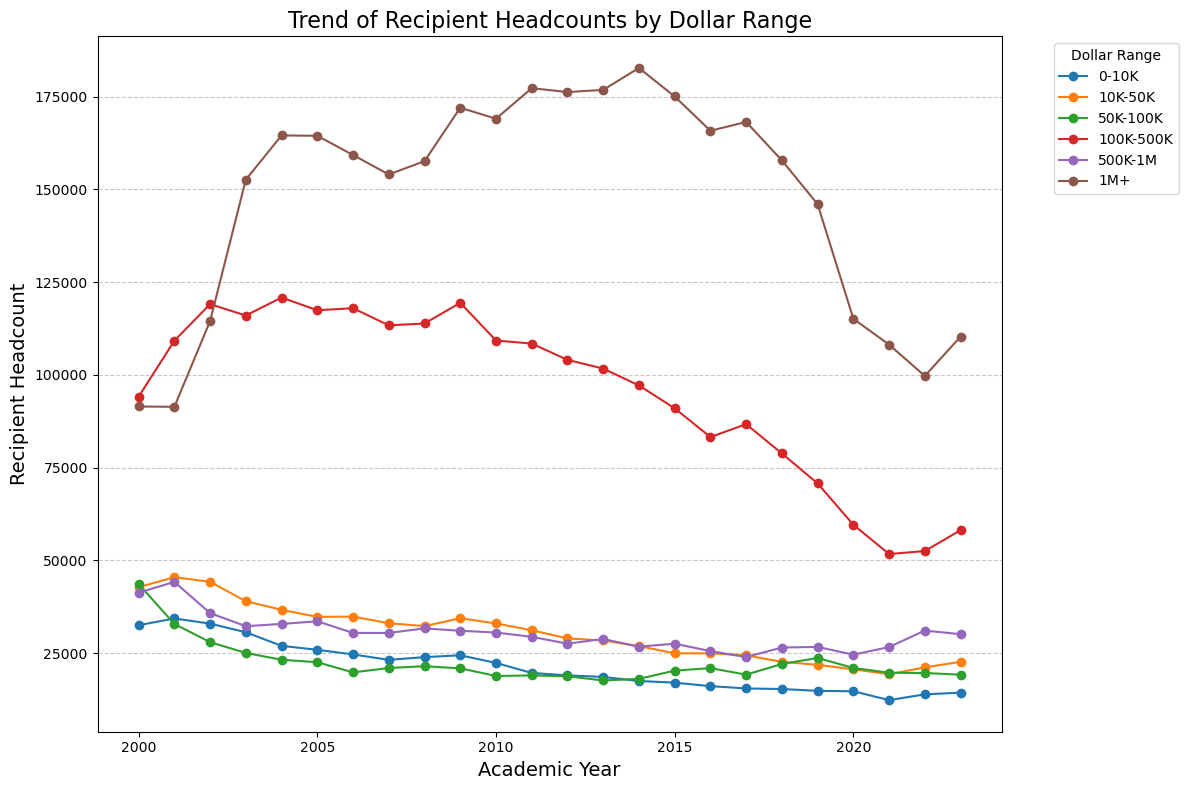

In [ ]:

# Create bins for 'TAP Recipient Dollars' to group into ranges
bins = [0, 10000, 50000, 100000, 500000, 1000000, df['TAP Recipient Dollars'].max()]
labels = ['0-10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '1M+']
df['Dollar Range'] = pd.cut(df['TAP Recipient Dollars'], bins=bins, labels=labels, include_lowest=True)

# Aggregate data: Sum headcounts for each dollar range by academic year
trend_data = df.groupby(['Academic Year', 'Dollar Range'])['TAP Recipient Headcount'].sum().reset_index()

# Pivot the data for plotting
pivot_trend = trend_data.pivot(index='Academic Year', columns='Dollar Range', values='TAP Recipient Headcount')

# Plot the trends
plt.figure(figsize=(12, 8))
pivot_trend.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Trend of Recipient Headcounts by Dollar Range', fontsize=16)
plt.xlabel('Academic Year', fontsize=14)
plt.ylabel('Recipient Headcount', fontsize=14)
plt.legend(title='Dollar Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The highest dollar range ("1M+") starts with a significant increase around the early 2000s, peaks, and then sharply declines starting around 2015.
The "100K-500K" range also shows a steady decline after peaking around 2009–2010.
Other lower ranges ("0-10K", "10K-50K", etc.) appear relatively stable with small fluctuations but no major trends of increase or decrease over time.
Dominance of the Higher Dollar Ranges:

Headcounts for recipients in the "1M+" and "100K-500K" ranges are significantly higher than those in the lower dollar ranges, emphasizing the disparity in distribution among these groups.
Recent Declines:

There is a noticeable decline in higher dollar ranges ("1M+" and "100K-500K") after 2015, potentially reflecting policy changes, reduced funding, or economic factors affecting these allocations.

<Figure size 1200x800 with 0 Axes>

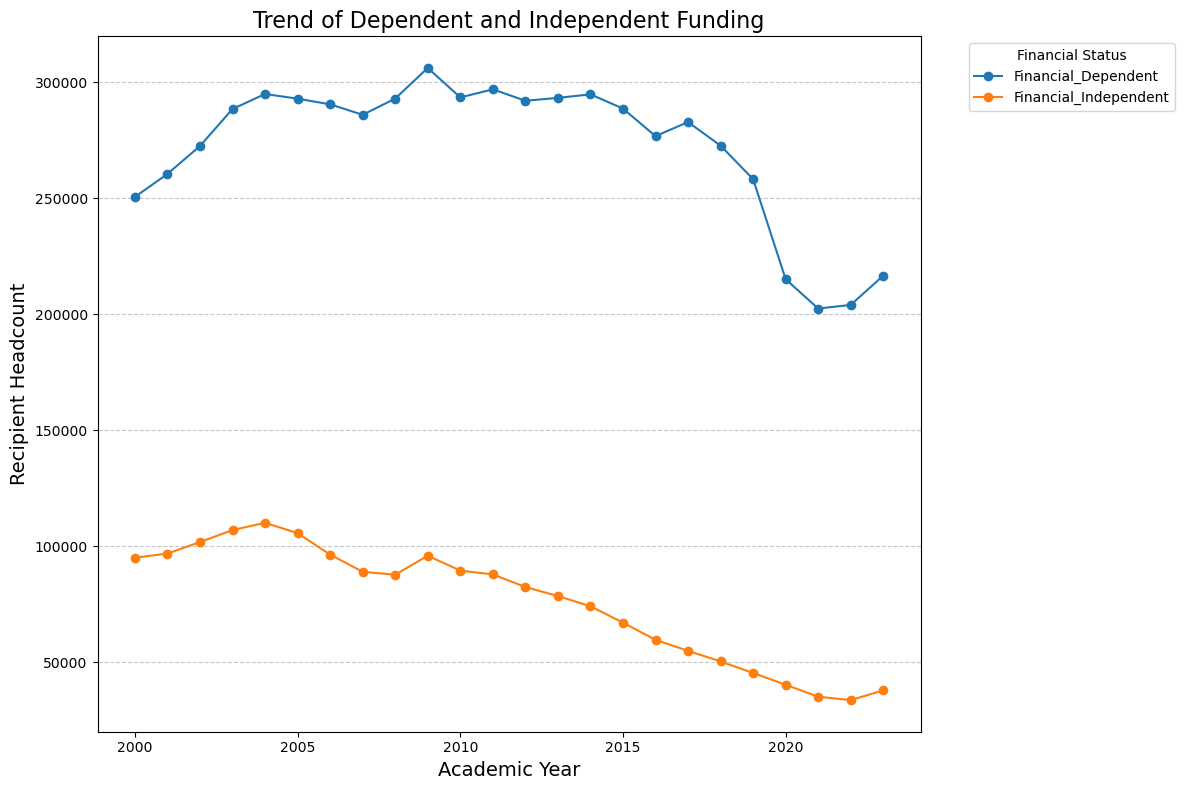

In [ ]:
# Aggregate the data: Sum headcounts for dependent and independent funding by academic year
funding_trend = df.groupby(['Academic Year', 'TAP Financial Status'])['TAP Recipient Headcount'].sum().reset_index()

# Pivot the data for easier plotting
pivot_funding = funding_trend.pivot(index='Academic Year', columns='TAP Financial Status', values='TAP Recipient Headcount')

# Plot the trends
plt.figure(figsize=(12, 8))
pivot_funding.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Trend of Dependent and Independent Funding', fontsize=16)
plt.xlabel('Academic Year', fontsize=14)
plt.ylabel('Recipient Headcount', fontsize=14)
plt.legend(title='Financial Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The number of financially dependent recipients (blue line) is consistently higher than financially independent recipients (orange line) throughout the time period.
Financially dependent headcounts peaked around 2010 and then saw a steep decline starting around 2015, stabilizing slightly after 2020.
Financially independent headcounts showed a steady decline over the entire period, with a sharper drop after 2015.

Both groups have seen a reduction, but the decline is proportionally sharper for financially independent recipients.
Potential Correlations:

The sharp declines after 2015 for both groups might correspond to policy, economic, or funding shifts, such as changes in eligibility criteria, program budgets, or external factors like tuition trends or student demographics.

<Figure size 1200x800 with 0 Axes>

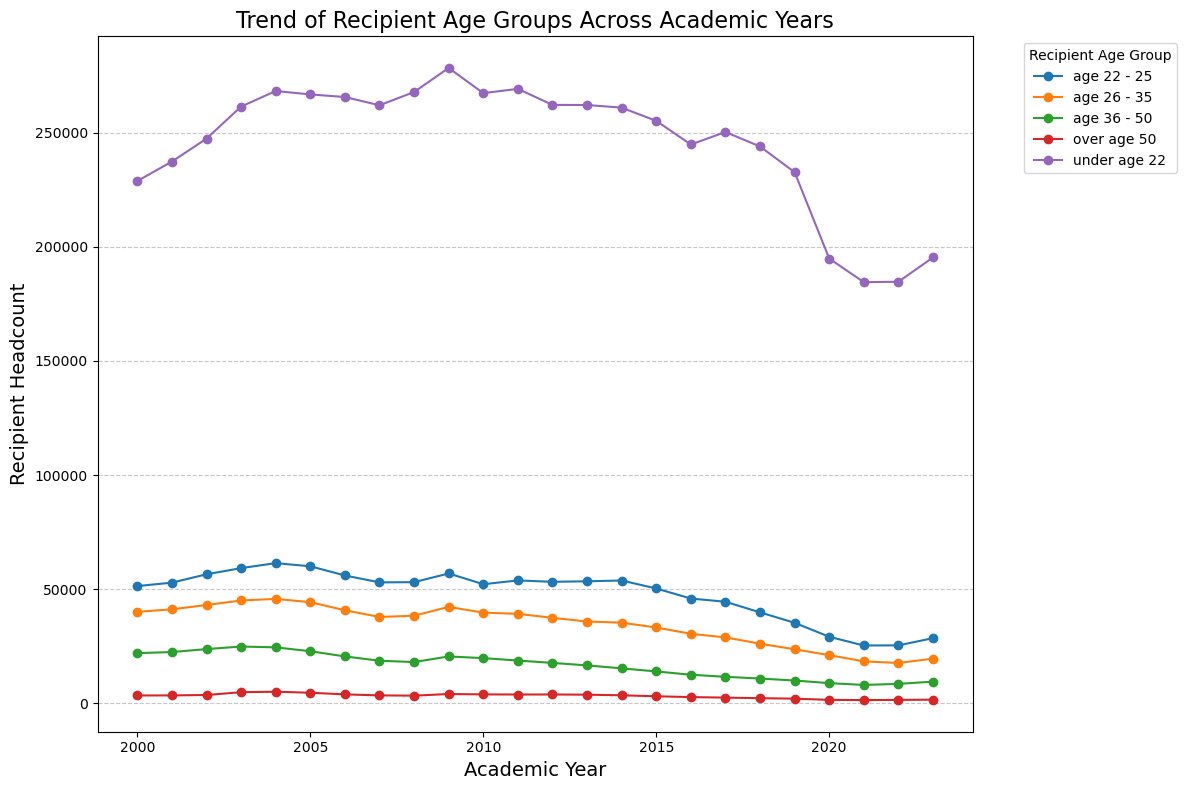

In [ ]:
import matplotlib.pyplot as plt

# Aggregate the data: Sum headcounts for each age group by academic year
trend_data = df.groupby(['Academic Year', 'Recipient Age Group'])['TAP Recipient Headcount'].sum().reset_index()

# Pivot the data to have academic years as rows and age groups as columns for easier plotting
pivot_trend = trend_data.pivot(index='Academic Year', columns='Recipient Age Group', values='TAP Recipient Headcount')

# Plot the trends
plt.figure(figsize=(12, 8))
pivot_trend.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Trend of Recipient Age Groups Across Academic Years', fontsize=16)
plt.xlabel('Academic Year', fontsize=14)
plt.ylabel('Recipient Headcount', fontsize=14)
plt.legend(title='Recipient Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The trend of recipient age groups across academic years helped us understand key patterns in TAP funding distribution. We can observe that the students "under age 22" group consistently have the highest recipient headcounts, which peaked around 2010 before it experienced a sharp decline after 2015 and was stabilized slightly after 2020. For other age groups, such as "age 22-25" and "age 26-35," we can observe relatively steady trends with minor fluctuations over time but it also exhibits declines starting around 2015. The "age 36-50" and "over age 50" groups remain the smallest categories throughout the period, with minimal changes. Basically, the overall decline across all age groups after 2015 may be attributed to changes in funding policies, eligibility criteria, or demographic shifts affecting the TAP program's reach.

In [ ]:
df.columns

Index(['Academic Year', 'Level', 'TAP Level of Study', 'Sector Type',
       'TAP Sector Group', 'Recipient Age Group', 'TAP Financial Status',
       'TAP Award Schedule', 'TAP Degree or NonDegree', 'TAP Schedule Letter',
       'Income by $1,000 Range', 'Income by $5,000 Range',
       'Income by $10,000 Range', 'TAP Recipient Headcount',
       'TAP Recipient FTEs', 'TAP Recipient Dollars', 'Dollar Range'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

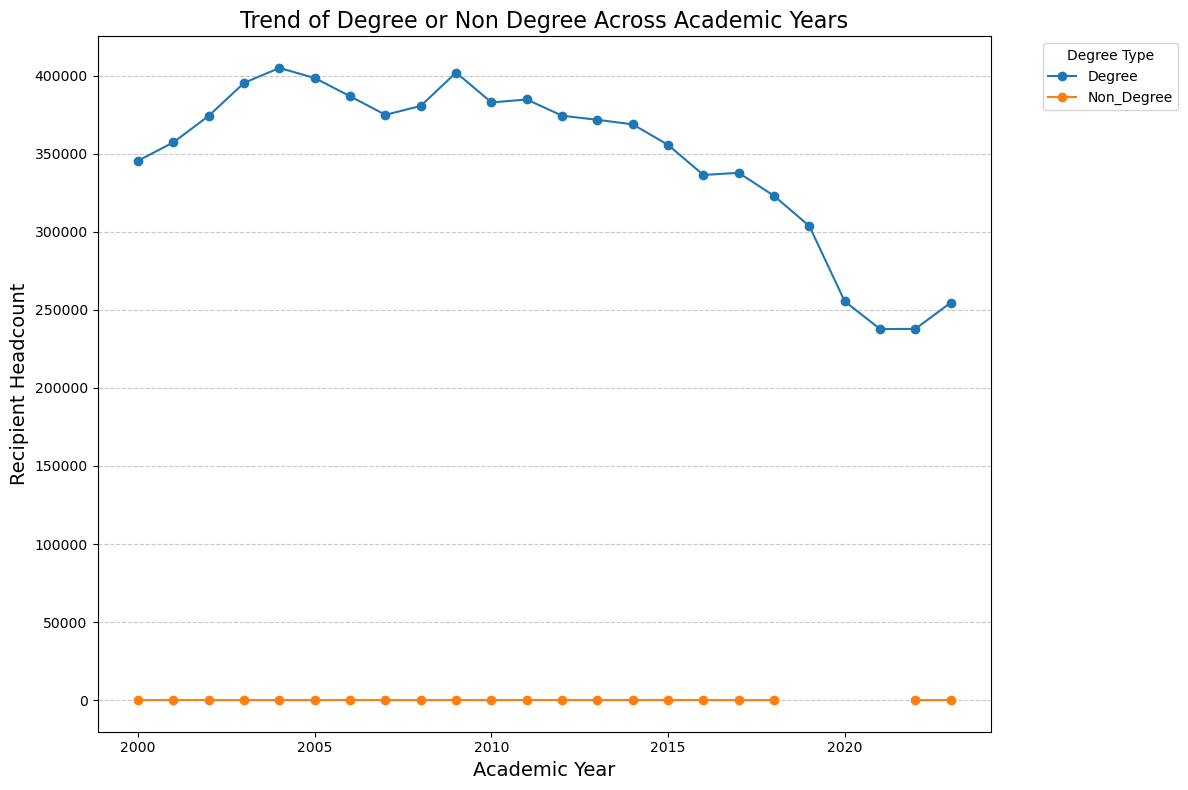

In [ ]:
import matplotlib.pyplot as plt

# Aggregate the data: Sum headcounts for each age group by academic year
trend_data2 = df.groupby(['Academic Year', 'TAP Degree or NonDegree'])['TAP Recipient Headcount'].sum().reset_index()

# Pivot the data to have academic years as rows and age groups as columns for easier plotting
pivot_trend2 = trend_data2.pivot(index='Academic Year', columns='TAP Degree or NonDegree', values='TAP Recipient Headcount')

# Plot the trends
plt.figure(figsize=(12, 8))
pivot_trend2.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Trend of Degree or Non Degree Across Academic Years', fontsize=16)
plt.xlabel('Academic Year', fontsize=14)
plt.ylabel('Recipient Headcount', fontsize=14)
plt.legend(title='Degree Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The trend of degree versus non-degree recipients across academic years highlights a disparity in headcounts. It can be observed that the degree recipients consistently formed the overwhelming majority, which peaked around 2010 and subsequently showed a steady decline after 2015, with a slight stabilization post-2020. However, on the other hand, the headcount for non-degree recipients remains negligible throughout the period, and this indicates that TAP funding primarily supports degree-seeking students. In this way, the overall decline in degree recipients after 2015 could be considered as a result of the policy changes, funding constraints, or evolving student enrollment patterns.

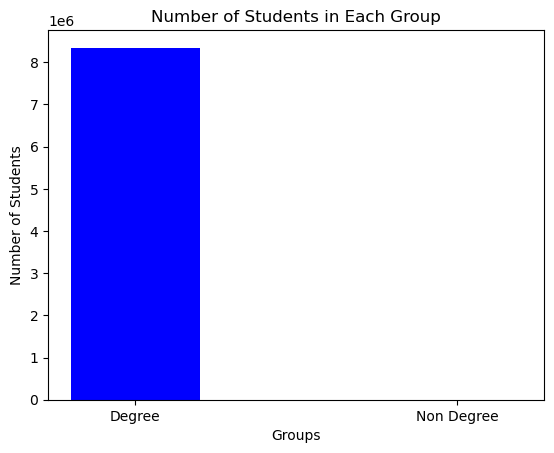

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data by 'Degree' and 'NonDegree'
df1 = df[df['TAP Degree or NonDegree'] == 'Degree']
df2 = df[df['TAP Degree or NonDegree'] == 'Non_Degree']

# Calculate the total headcount for each group
degree_headcount = df1['TAP Recipient Headcount'].sum()
nondegree_headcount = df2['TAP Recipient Headcount'].sum()

# Create data for plotting
headcounts = [degree_headcount, nondegree_headcount]
labels = ['Degree', 'Non Degree']

# Plot
X_axis = np.arange(len(labels))
plt.bar(X_axis, headcounts, width=0.4, color=['blue', 'orange'])

# Formatting the plot
plt.xticks(X_axis, labels)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in Each Group")
plt.show()


In [ ]:
nondegree_headcount

930

The visualization displaying the number of students in each group underscores the clear dominance of degree-seeking students in the TAP program. The count of degree recipients is significantly higher and has crossed 8 million, whereas the number of non-degree recipients which is around 930, it is negligible as compared to the degree-seeking students. This stark difference highlights that TAP funding highly supports students pursuing degrees, but have minimal allocation to non-degree programs. This distribution highlights us that the program majorly focuses on aiding higher education through structured degree pathways.

In [ ]:
#get the correlation between the variables

# Calculate the correlation matrix
correlation = df_scaled.corr()

# Display the correlation matrix
correlation

,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
TAP Recipient Headcount,1.000000,0.995355,0.936962
TAP Recipient FTEs,0.995355,1.000000,0.943827
TAP Recipient Dollars,0.936962,0.943827,1.000000


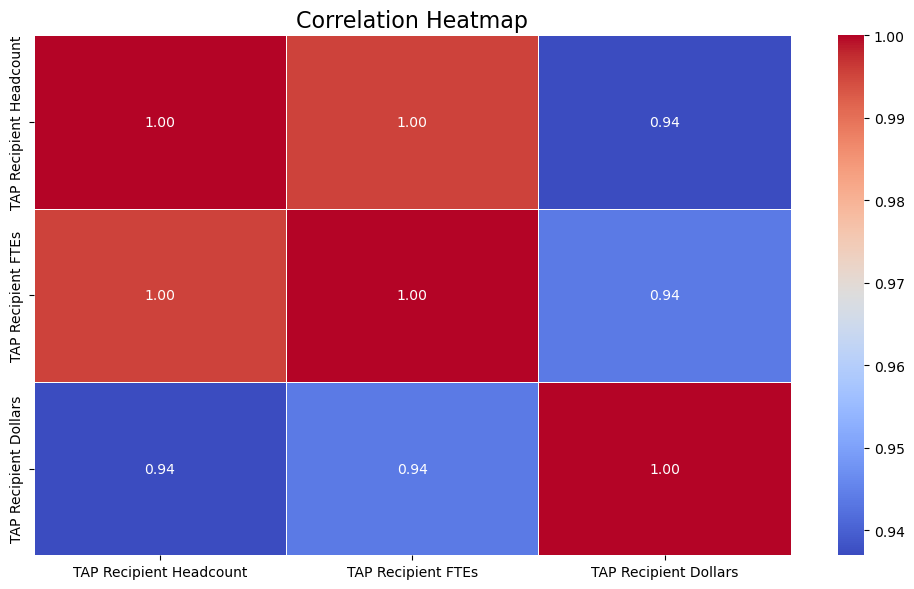

In [ ]:

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
plt.title('Correlation Heatmap', fontsize=16)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.show()


 The correlation heatmap helps in revealing strong relationships among three different attributes including TAP recipient headcounts, full-time equivalents (FTEs), and recipient dollars. Based on the visualization, we can observe that there is a perfect correlation (1.00) between headcount and FTEs, which indicates that these metrics are directly proportional and closely linked. Additionally, the recipient dollars showcase a very high correlation (0.94) with both headcount and FTEs, and suggests that funding allocation is strongly tied to the number of recipients and their enrollment status. These insights strongly indicate that the distribution of TAP funds align proportionally with student participation, and reflects a systematic funding approach based on enrollment metrics.

# Hypothesis Testing

In [ ]:
columns_to_drop = ['TAP Recipient Headcount', 'TAP Recipient FTEs', 'TAP Recipient Dollars']
df = df.drop(columns=columns_to_drop)
df.head()

,Academic Year,Level,TAP Level of Study,Sector Type,TAP Sector Group,Recipient Age Group,TAP Financial Status,TAP Award Schedule,TAP Degree or NonDegree,TAP Schedule Letter,"Income by $1,000 Range","Income by $5,000 Range","Income by $10,000 Range",Dollar Range
0,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 22 - 25,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",0-10K
1,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 22 - 25,Financial_Dependent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K
2,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 26 - 35,Financial_Dependent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",0-10K
3,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 26 - 35,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K
4,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 36 - 50,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K


In [ ]:
df.head()

,Academic Year,Level,TAP Level of Study,Sector Type,TAP Sector Group,Recipient Age Group,TAP Financial Status,TAP Award Schedule,TAP Degree or NonDegree,TAP Schedule Letter,"Income by $1,000 Range","Income by $5,000 Range","Income by $10,000 Range",Dollar Range
0,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 22 - 25,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",0-10K
1,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 22 - 25,Financial_Dependent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K
2,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 26 - 35,Financial_Dependent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",0-10K
3,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 26 - 35,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K
4,2023,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 36 - 50,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K


In [ ]:
print(list(df.columns))

['Academic Year', 'Level', 'TAP Level of Study', 'Sector Type', 'TAP Sector Group', 'Recipient Age Group', 'TAP Financial Status', 'TAP Award Schedule', 'TAP Degree or NonDegree', 'TAP Schedule Letter', 'Income by $1,000 Range', 'Income by $5,000 Range', 'Income by $10,000 Range', 'Dollar Range']


In [ ]:
previous_df = pd.read_csv('transformed_data.csv')

In [ ]:
# Assuming 'previous_df' is your previous dataset and 'df' is your current dataset
combined_df = pd.concat([df, previous_df], axis=1)

# Display the first 5 rows of the combined dataset
combined_df.head()

,Academic Year,Level,TAP Level of Study,Sector Type,TAP Sector Group,Recipient Age Group,TAP Financial Status,TAP Award Schedule,TAP Degree or NonDegree,TAP Schedule Letter,"Income by $1,000 Range","Income by $5,000 Range","Income by $10,000 Range",Dollar Range,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,2023.0,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 22 - 25,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",0-10K,-0.166806,-0.167364,-0.105740
1,2023.0,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 22 - 25,Financial_Dependent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K,-0.132420,-0.154502,-0.089203
2,2023.0,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 26 - 35,Financial_Dependent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",0-10K,-0.178267,-0.176224,-0.117413
3,2023.0,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 26 - 35,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K,-0.138151,-0.153645,-0.087756
4,2023.0,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 36 - 50,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K,-0.143882,-0.157932,-0.093517


In [ ]:
combined_df = combined_df[:-3]
combined_df.head()

,Academic Year,Level,TAP Level of Study,Sector Type,TAP Sector Group,Recipient Age Group,TAP Financial Status,TAP Award Schedule,TAP Degree or NonDegree,TAP Schedule Letter,"Income by $1,000 Range","Income by $5,000 Range","Income by $10,000 Range",Dollar Range,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,2023.0,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 22 - 25,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",0-10K,-0.166806,-0.167364,-0.105740
1,2023.0,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 22 - 25,Financial_Dependent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K,-0.132420,-0.154502,-0.089203
2,2023.0,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 26 - 35,Financial_Dependent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",0-10K,-0.178267,-0.176224,-0.117413
3,2023.0,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 26 - 35,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K,-0.138151,-0.153645,-0.087756
4,2023.0,U,2 yr Undergrad,PUBLIC,1-CUNY SR,age 36 - 50,Financial_Independent,Dependent_Schedule,Degree,B,$ 0,$ 0,"$ 0 to $10,000",10K-50K,-0.143882,-0.157932,-0.093517


In [ ]:
output_file_path = 'combined_data.csv'
combined_df.to_csv(output_file_path, index=False)
print(f"Combined data saved to: {output_file_path}")

Combined data saved to: combined_data.csv


## 1st Hypothesis: 2 sample T-Test

We comparing TAP Recipient Dollars Between Financial_Independent and Financial_Dependent Groups

In [ ]:
import pandas as pd
import scipy.stats as stats

file_path = 'combined_data.csv'
df = pd.read_csv(file_path)

group1 = df[df['TAP Financial Status'] == 'Financial_Independent']['TAP Recipient Dollars']
group2 = df[df['TAP Financial Status'] == 'Financial_Dependent']['TAP Recipient Dollars']

group1_clean = group1.dropna()
group2_clean = group2.dropna()

t_stat, p_value = stats.ttest_ind(group1_clean, group2_clean, equal_var = False, alternative='greater')

print("\n--- Two-Sample One sided t-Test Results ---\n")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nConclusion: We reject the null hypothesis (H₀).")
    print("This suggests that there is a significant difference in TAP Recipient Dollars between Financial Independent and Financial Dependent groups.")
    print("The mean TAP Recipient Dollars for Financial Independent group is greater than that of Financial Dependent group.")
    # print("This suggests that there is a significant difference in TAP Recipient Dollars between Financial Independent and Financial Dependent groups.")
else:
    print("\nConclusion: We fail to reject the null hypothesis (H₀).")
    print("This suggests that there is no significant difference in TAP Recipient Dollars between Financial Independent and Financial Dependent groups.")

    # print("\nConclusion: We fail to reject the null hypothesis (H₀).")
    # print("This suggests that there is no significant difference in TAP Recipient Dollars between Financial Independent and Financial Dependent groups.")


--- Two-Sample One sided t-Test Results ---

T-statistic: 14.1451
P-value: 0.0000

Conclusion: We reject the null hypothesis (H₀).
This suggests that there is a significant difference in TAP Recipient Dollars between Financial Independent and Financial Dependent groups.
The mean TAP Recipient Dollars for Financial Independent group is greater than that of Financial Dependent group.


The results of the t-test received during this hypothesis testing, gave us a T-statistic value of 14.1451 and a p-value of 0.0000, indicating strong statistical significance (p < 0.05). As a result, we reject the null hypothesis (H0) and concluded that there is a significant difference in TAP Recipient Dollars between the two groups. Specifically it was observed that the mean TAP Recipient Dollars for the financially independent group is significantly greater as compared to the financially dependent group. This observation highlighted that the financial independence might be associated with higher TAP Recipient Dollars, indicating further exploration of the underlying factors that contribute to this disparity.

## 2nd Hypothesis: ANOVA

We test if there are differences in TAP Recipient Dollars Across Recipient Age Group Categories

In [ ]:
# Perform Levene's test for homogeneity of variances
from scipy.stats import levene

age_groups = combined_df['Recipient Age Group'].unique()
groups = [combined_df[combined_df['Recipient Age Group'] == group]['TAP Recipient Dollars'].dropna() for group in age_groups]

# Levene's test (tests if the variances are equal)
levene_stat, levene_p_value = levene(*groups)

if levene_p_value < 0.05:
    print("Levene's test: Variances are significantly different (reject H₀). Using Welch's ANOVA.")
else:
    print("Levene's test: Variances are not significantly different (fail to reject H₀). Proceeding with standard ANOVA.")


Levene's test: Variances are significantly different (reject H₀). Using Welch's ANOVA.


From above results, we find that variances are significantly different so we use Welch's Anova

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Prepare the data for statsmodels ANOVA (combine into a long-form DataFrame)
df_long = combined_df[['TAP Recipient Dollars', 'Recipient Age Group']].dropna()
df_long['Recipient Age Group'] = df_long['Recipient Age Group'].astype('category')
df_long.rename(columns={'Recipient Age Group': 'Recipient_Age_Group'}, inplace=True)
df_long.rename(columns={'TAP Recipient Dollars': 'TAP_Recipient_Dollars'}, inplace=True)


# Perform ANOVA using statsmodels
model = ols('TAP_Recipient_Dollars ~ C(Recipient_Age_Group)', data=df_long).fit()  # Use 'C()' for categorical variable
# model = ols('`TAP Recipient Dollars` ~ C(`Recipient Age Group`)', data=df_long).fit()  # Use 'C()' for categorical variable
anova_table = anova_lm(model, typ=2)

# Display ANOVA table
print(anova_table)



                               sum_sq        df           F  PR(>F)
C(Recipient_Age_Group)    1942.522990       4.0  489.271748     0.0
Residual                258037.373384  259972.0         NaN     NaN


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     TAP_Recipient_Dollars   R-squared:                       0.007
Model:                               OLS   Adj. R-squared:                  0.007
Method:                    Least Squares   F-statistic:                     489.3
Date:                   Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                           13:48:23   Log-Likelihood:            -3.6792e+05
No. Observations:                 259977   AIC:                         7.358e+05
Df Residuals:                     259972   BIC:                         7.359e+05
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.0604      0.004    -15.434      0.000      -0.068      -0.053
C(Recipient_Age_Group)[T.age 26 - 35]     -0.0011      0.005     -0.200      0.841      -0.012       0.010
C(Recipient_Age_Group)[T.age 36 - 50]      0.0266      0.006      4.461      0.000       0.015       0.038
C(Recipient_Age_Group)[T.over age 50]      0.2554      0.008     32.372      0.000       0.240       0.271
C(Recipient_Age_Group)[T.under age 22]     0.1628      0.006     28.289      0.000       0.152       0.174
==============================================================================
Omnibus:                   715711.339   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      30585546606.920
Skew:                          35.070   Prob(JB):                         0.00
Kurtosis:                    1681.872   Cond. No.                         5.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from tabulate import tabulate

# Prepare the results for the table
results_table = []
for variable in model.params.index:
    coef = model.params[variable]
    std_err = model.bse[variable]
    t_value = model.tvalues[variable]
    p_value = model.pvalues[variable]
    ci_lower, ci_upper = model.conf_int().loc[variable]

    # Append each row (variable's stats) to the results table
    results_table.append([variable, coef, std_err, t_value, p_value, ci_lower, ci_upper])

# Create the headers for the table
headers = ['Variable', 'Coefficient', 'Std. Error', 't-Value', 'P-Value', '95% CI Lower', '95% CI Upper']

# Print the formatted table using tabulate
print(tabulate(results_table, headers, tablefmt="grid"))


+----------------------------------------+---------------+--------------+------------+--------------+----------------+----------------+
| Variable                               |   Coefficient |   Std. Error |    t-Value |      P-Value |   95% CI Lower |   95% CI Upper |
+========================================+===============+==============+============+==============+================+================+
| Intercept                              |   -0.0603757  |   0.00391177 | -15.4344   | 1.01544e-53  |     -0.0680427 |    -0.0527087  |
+----------------------------------------+---------------+--------------+------------+--------------+----------------+----------------+
| C(Recipient_Age_Group)[T.age 26 - 35]  |   -0.00108981 |   0.00544467 |  -0.200162 | 0.841354     |     -0.0117612 |     0.00958159 |
+----------------------------------------+---------------+--------------+------------+--------------+----------------+----------------+
| C(Recipient_Age_Group)[T.age 36 - 50]  |    0.

After Levene's test was implemented, it was identified that the variances among age groups were significantly different (p < 0.05), which justifies the application of Welch's ANOVA. The ANOVA results highlighted that TAP Recipient Dollars varied significantly across different age groups (F = 489.27, p < 0.001). After additional analysis through regression coefficients we received following insights:  

1. Age 26-35: For age 26-35, the p-value (0.841) is large, so we fail to reject the null hypothesis, meaning there is no significant difference in TAP recipient dollars for this group as compared to the reference group.


2. For the other age groups (age 36-50, over age 50, and under age 22), the p-values are all less than 0.05, meaning we reject the null hypothesis in each case and conclude that the differences in TAP recipient dollars are statistically significant for these age groups.


## 3rd Hypothesis: Chi-Square Test

We testing the Independence Between TAP Financial Status and TAP Degree or NonDegree

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(combined_df['TAP Financial Status'], combined_df['TAP Degree or NonDegree'])

# Perform Chi-Square Test for Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Conclusion based on p-value
if p_value < 0.05:
    print("Conclusion: We reject the null hypothesis. There is an association between TAP Financial Status and TAP Degree or NonDegree.")
else:
    print("Conclusion: We fail to reject the null hypothesis. There is no significant association between TAP Financial Status and TAP Degree or NonDegree.")


Chi-square statistic: 44.8589
P-value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[ 99442.61300869    192.38699131]
 [160035.38699131    309.61300869]]
Conclusion: We reject the null hypothesis. There is an association between TAP Financial Status and TAP Degree or NonDegree.


The results received from the Chi-Square test i.e., chi-square statistic = 44.8589, and p-value = 0.0000,  indicate a significant association between the two attributes - TAP Financial Status and TAP Degree or NonDegree because the p-value is less than the significance level of 0.05. This indicates that the two attributes are related to each other which means that TAP Financial Status is strongly associated with whether individuals hold a degree or not.

## 4th Hypothesis: ANOVA

We check ff the mean TAP Recipient Dollars differs significantly across multiple TAP Sector Groups.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

file_path = 'combined_data.csv'
df = pd.read_csv(file_path)

df.rename(columns={
    'TAP Recipient Dollars': 'TAP_Recipient_Dollars',
    'TAP Sector Group': 'TAP_Sector_Group',
    'TAP Level of Study': 'TAP_Level_of_Study',
    'Sector Type': 'Sector_Type',
    'Income by $10,000 Range': 'Income_Range'
}, inplace=True)

anova_model = ols('TAP_Recipient_Dollars ~ C(TAP_Sector_Group)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print(anova_table)

                            sum_sq        df          F        PR(>F)
C(TAP_Sector_Group)     287.423935       8.0  35.966111  1.812975e-57
Residual             259692.472438  259968.0        NaN           NaN


In [ ]:
anova_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     TAP_Recipient_Dollars   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     35.97
Date:                   Wed, 11 Dec 2024   Prob (F-statistic):           1.81e-57
Time:                           13:48:27   Log-Likelihood:            -3.6875e+05
No. Observations:                 259977   AIC:                         7.375e+05
Df Residuals:                     259968   BIC:                         7.376e+05
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.0404      0.005      7.917      0.000       0.030       0.050
C(TAP_Sector_Group)[T.2-CUNY CC]         -0.0356      0.009     -4.055      0.000      -0.053      -0.018
C(TAP_Sector_Group)[T.3-SUNY SO]         -0.0464      0.007     -7.019      0.000      -0.059      -0.033
C(TAP_Sector_Group)[T.4-SUNY CC]         -0.0358      0.008     -4.696      0.000      -0.051      -0.021
C(TAP_Sector_Group)[T.5-INDEPENDENT]     -0.0161      0.007     -2.433      0.015      -0.029      -0.003
C(TAP_Sector_Group)[T.6-BUS. DEGREE]     -0.0805      0.007    -11.238      0.000      -0.095      -0.066
C(TAP_Sector_Group)[T.7-BUS. NON-DEG]    -0.1180      0.013     -9.240      0.000      -0.143      -0.093
C(TAP_Sector_Group)[T.8-OTHER]           -0.1545      0.014    -11.277      0.000      -0.181      -0.128
C(TAP_Sector_Group)[T.9-CHAPTER XXII]    -0.0347      0.016     -2.183      0.029      -0.066      -0.004
==============================================================================
Omnibus:                   715064.324   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      30259868606.465
Skew:                          34.989   Prob(JB):                         0.00
Kurtosis:                    1672.901   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from tabulate import tabulate

# Prepare the results for the table
results_table = []
for variable in anova_model.params.index:
    coef = anova_model.params[variable]
    std_err = anova_model.bse[variable]
    t_value = anova_model.tvalues[variable]
    p_value = anova_model.pvalues[variable]
    ci_lower, ci_upper = anova_model.conf_int().loc[variable]

    # Append each row (variable's stats) to the results table
    results_table.append([variable, coef, std_err, t_value, p_value, ci_lower, ci_upper])

# Create the headers for the table
headers = ['Variable', 'Coefficient', 'Std. Error', 't-Value', 'P-Value', '95% CI Lower', '95% CI Upper']

# Print the formatted table using tabulate
print(tabulate(results_table, headers, tablefmt="grid"))


+---------------------------------------+---------------+--------------+-----------+-------------+----------------+----------------+
| Variable                              |   Coefficient |   Std. Error |   t-Value |     P-Value |   95% CI Lower |   95% CI Upper |
+=======================================+===============+==============+===========+=============+================+================+
| Intercept                             |     0.0403981 |   0.00510272 |   7.91697 | 2.44312e-15 |      0.0303969 |     0.0503993  |
+---------------------------------------+---------------+--------------+-----------+-------------+----------------+----------------+
| C(TAP_Sector_Group)[T.2-CUNY CC]      |    -0.0356045 |   0.00878054 |  -4.05493 | 5.01636e-05 |     -0.0528141 |    -0.0183949  |
+---------------------------------------+---------------+--------------+-----------+-------------+----------------+----------------+
| C(TAP_Sector_Group)[T.3-SUNY SO]      |    -0.0463814 |   0.0066079

Baseline : '1-CUNY SR'

Intercept: 0.0404

This is the coefficient for the reference category of TAP_Sector_Group (which is likely the first level, e.g., "CUNY Community College" or another baseline group). It represents the estimated mean value of TAP_Recipient_Dollars for the baseline group when all other predictors are held constant.
P-Value: The p-value is extremely small (2.43e-15), indicating that this estimate is highly significant.

The p-values for most groups are very small (well below 0.05), suggesting that the differences in TAP_Recipient_Dollars between the various groups and the baseline group are statistically significant.
The exception is for TAP_Sector_Group[T.STAP], which does not show significance, with a p-value of 0.205.

We noted that the ANOVA test results showed a significant difference in TAP Recipient Dollars across the various TAP Sector Groups with scores like F-statistic = 35.97, p-value < 0.05. Hence, we reject the null hypothesis. This helped us detect that the mean TAP Recipient Dollars varies significantly across different sectors. Specifically, groups such as "BUS. NON-DEG" and "OTHER" showcased the largest reductions in TAP dollars as compared to the baseline group. Additionally, the p-values for most groups were observed to be well below the significance threshold and this helped us ensure that these differences are statistically significant.

Groups like "BUS. NON-DEG" and "OTHER" have the largest negative coefficients, indicating the most considerable reduction in TAP_Recipient_Dollars relative to the baseline.
Based on the p-values, we reject the null hypothesis for most groups, indicating that these differences are statistically significant.

In [ ]:
combined_df['TAP Sector Group'].unique()

array(['1-CUNY SR', '2-CUNY CC', '3-SUNY SO', '4-SUNY CC',
       '5-INDEPENDENT', '6-BUS. DEGREE', '7-BUS. NON-DEG', '8-OTHER',
       '9-CHAPTER XXII'], dtype=object)

## 5th Hypothesis: Linear regression analysis
Do Tap level of study, sector type and income have an impact on the Tap recipient dollars?

In [ ]:
regression_model = ols('TAP_Recipient_Dollars ~ C(TAP_Level_of_Study) + C(Sector_Type) + C(Income_Range)', data=df).fit()

print(regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     TAP_Recipient_Dollars   R-squared:                       0.011
Model:                               OLS   Adj. R-squared:                  0.011
Method:                    Least Squares   F-statistic:                     230.7
Date:                   Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                           13:48:31   Log-Likelihood:            -3.6740e+05
No. Observations:                 259977   AIC:                         7.348e+05
Df Residuals:                     259963   BIC:                         7.350e+05
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

This tests whether at least one of the independent variables significantly explains the variation in the dependent variable. Since the p-value for the F-statistic is 0.00, we can reject the null hypothesis, meaning that at least one of the predictors is significant.
Prob (F-statistic): 0.00

This p-value indicates that the model is statistically significant overall, meaning that at least one of the independent variables is significantly related to TAP_Recipient_Dollars.


TAP_Level_of_Study[T.4 yr Undergrad]: 0.1001 (p-value = 0.000)

The coefficient of 0.1001 means that, on average, individuals in the "4-year Undergrad" group receive 0.1001 more in TAP Recipient Dollars than the baseline category (T. 2 yr Undergrad).
TAP_Level_of_Study[T.5 yr Undergrad]: -0.0998 (p-value = 0.000)

Individuals in the "5-year Undergrad" group receive 0.0998 less in TAP Recipient Dollars compared to the baseline group.
TAP_Level_of_Study[T.Grad]: -0.1664 (p-value = 0.000)

Individuals in the "Graduate" group receive 0.1664 less in TAP Recipient Dollars compared to the baseline group.
TAP_Level_of_Study[T.STAP]: -0.0877 (p-value = 0.205)

The coefficient is -0.0877, but since the p-value is 0.205, it is not statistically significant. We fail to reject the null hypothesis that this group does not have a significant effect on TAP Recipient Dollars.
TAP_Level_of_Study[T.Unknown]: -0.0334 (p-value = 0.896)

This coefficient is -0.0334, and the p-value is 0.896, which is very high. This suggests that the "Unknown" category has no significant effect on TAP Recipient Dollars.


The p-values for each coefficient indicate the statistical significance of that variable:

Significant Variables: The categories TAP_Level_of_Study[T.4 yr Undergrad], TAP_Level_of_Study[T.5 yr Undergrad], and TAP_Level_of_Study[T.Grad] are statistically significant (p-value < 0.05). These are the groups that have a significant effect on TAP Recipient Dollars.
Not Significant Variables: TAP_Level_of_Study[T.STAP] and TAP_Level_of_Study[T.Unknown] have high p-values (> 0.05), meaning they don't significantly affect the dependent variable in this model.

 Upon observing the results, we found that the overall regression model is statistically significant (F-statistic = 230.7, p-value < 0.05), and indicates that at least one of the independent variables have an effect on TAP Recipient Dollars. Among the significant predictors, the "4-year Undergrad" group receives more TAP dollars, whereas the "5-year Undergrad" and "Graduate" groups receive less TAP dollars as compared to the baseline group (2-year Undergrad). The remaining categories for TAP level of study were not found to significantly affect TAP dollars. Additionally, it was found that the higher income ranges were associated with a decrease in TAP Recipient Dollars.

## 6th Hypothesis: Linear regression

We check the relationship Between TAP Recipient Headcount and TAP Recipient Dollars

In [ ]:
import statsmodels.api as sm
from scipy.stats import pearsonr

file_path = 'combined_data.csv'
df = pd.read_csv(file_path)

df.rename(columns={
    'TAP Recipient Dollars': 'TAP_Recipient_Dollars',
    'TAP Recipient Headcount': 'TAP_Recipient_Headcount'
}, inplace=True)

df_clean = df[['TAP_Recipient_Headcount', 'TAP_Recipient_Dollars']].dropna()

# **4. Pearson Correlation Test**
corr_coefficient, p_value_corr = pearsonr(df_clean['TAP_Recipient_Headcount'], df_clean['TAP_Recipient_Dollars'])

print("\n--- Pearson Correlation Results ---\n")
print(f"Correlation Coefficient (r) = {corr_coefficient:.4f}")
print(f"p-value = {p_value_corr:.4f}")

# **5. Simple Linear Regression**
X = df_clean['TAP_Recipient_Headcount']
y = df_clean['TAP_Recipient_Dollars']

# Add a constant to the independent variable (required for statsmodels regression)
X = sm.add_constant(X)

regression_model = sm.OLS(y, X).fit()

print("\n--- Simple Linear Regression Results ---\n")
print(regression_model.summary())


--- Pearson Correlation Results ---

Correlation Coefficient (r) = 0.9370
p-value = 0.0000

--- Simple Linear Regression Results ---

                              OLS Regression Results                             
Dep. Variable:     TAP_Recipient_Dollars   R-squared:                       0.878
Model:                               OLS   Adj. R-squared:                  0.878
Method:                    Least Squares   F-statistic:                 1.869e+06
Date:                   Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                           13:48:31   Log-Likelihood:                -95540.
No. Observations:                 259977   AIC:                         1.911e+05
Df Residuals:                     259975   BIC:                         1.911e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err

Pearson Correlation Test
Correlation Coefficient (r) = 0.9370:
The correlation coefficient of 0.9370 indicates a very strong positive linear relationship between TAP Recipient Headcount and TAP Recipient Dollars. As the headcount increases, the TAP recipient dollars also tend to increase.
p-value = 0.0000:
The p-value is very small, essentially zero, which means there is overwhelming evidence to reject the null hypothesis of no correlation. This indicates that the correlation between the two variables is statistically significant.



The F-statistic is very large, which indicates that the model is a good fit to the data. This suggests that the independent variable (headcount) significantly explains the variation in the dependent variable (TAP recipient dollars).

We reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁).
This suggests there is a significant positive linear relationship between TAP Recipient Headcount and TAP Recipient Dollars. In other words, as the TAP recipient headcount increases, TAP recipient dollars also tend to increase.

Therefore, based on the results we received, we found that the Pearson correlation coefficient of 0.9370 indicates a very strong positive linear relationship between the two attributes - TAP Recipient Headcount and TAP Recipient Dollars, and a p-value of 0.0000 confirms the statistical significance of this correlation. Even the linear regression model further supports this, with a very high R-squared value of 0.878, which suggests that TAP Recipient Headcount explains approximately 87.8\% of the variation in TAP Recipient Dollars. In this way, it implies that as the headcount increases, TAP recipient dollars also tend to increase in a strongly predictable manner.